In [1]:
import music21
from music21.note import Note
from common import ANNOTATIONSCOREDUPLES
import seaborn as sns
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from score_parser import parseScore
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [44]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.a_isOnset].a_pitchNames.index.to_list()
    annotationNotes = a[a.a_isOnset].a_pitchNames.to_list()
    annotationText = a[a.a_isOnset].a_romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

def getBassPresence(annotationRanges, s):
    ret = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end].iloc[:-1]
        annotationBass = annotationNotes[0]
        scoreBasses = [Note(chord[0]).name for chord in slices.s_notes]
        counts = scoreBasses.count(annotationBass)
        inversionScore = 1.0 - counts/len(scoreBasses)
#         print(annotationBass, scoreBasses, inversionScore)
        ret.append(inversionScore)
    return ret

In [45]:
f = "abc-op131-1"
aPath, sPath = ANNOTATIONSCOREDUPLES[f]

In [46]:
# aScore = music21.converter.parse(aPath, format="romantext").show("musicxml")
# sScore = music21.converter.parse(sPath).chordify().show("musicxml")

In [49]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
annotationRanges = getAnnotationOffsets(a)
inversionMetrics = getBassPresence(annotationRanges, s)

In [53]:
qualitydfdict = {
    "start": [],
    "end": [],
    "romanNumeral": [],
    "annotationPitchNames": [],
    "inversionScore": []
}

for i in range(len(annotationRanges)):
    start, end, annotationPitchNames, romanNumeral = annotationRanges[i]
    inversionScore = inversionMetrics[i]
    qualitydfdict["start"].append(start)
    qualitydfdict["end"].append(end)
    qualitydfdict["romanNumeral"].append(romanNumeral)
    qualitydfdict["annotationPitchNames"].append(annotationPitchNames)
    qualitydfdict["inversionScore"].append(inversionScore)

In [54]:
qualitydf = pd.DataFrame(qualitydfdict)

In [55]:
qualitydf

,start,end,romanNumeral,annotationPitchNames,inversionScore
0,0.0,1.0,i,"(G#, C#, E)",0.000000
1,1.0,3.0,V,"(B#, D#, G#)",0.000000
2,3.0,5.0,i,"(C#, E, G#)",0.000000
3,5.0,8.0,iv,"(A, C#, F#)",0.000000
4,8.0,9.0,i,"(G#, C#, E)",0.000000
5,9.0,11.0,iv,"(F#, A, C#)",0.500000
6,11.0,13.0,V7,"(G#, B#, D#, F#)",0.500000
7,13.0,15.0,i,"(E, G#, C#)",0.500000
8,15.0,17.0,i,"(C#, E, G#)",0.500000
9,17.0,19.0,viio/iv,"(E#, G#, B)",0.000000


Top problematic annotations:


,start,end,romanNumeral,annotationPitchNames,inversionScore
13,25.0,28.0,Ger7,"(A, C#, E, F##)",1.0
16,31.0,32.0,i,"(G#, C#, E)",1.0
25,41.0,42.0,V7/vii,"(F##, A##, C##, E#)",1.0
29,45.0,46.0,V7/vi,"(E#, G##, B#, D#)",1.0
36,54.0,56.0,vii,"(D#, F##, B#)",1.0
37,56.0,57.0,viio/vii,"(C##, E#, A##)",1.0
38,57.0,58.0,vii,"(B#, D#, F##)",1.0
40,59.0,60.0,VI,"(A, C#, E)",1.0
41,60.0,61.0,vii,"(B#, D#, F##)",1.0
44,64.0,65.0,vii,"(F##, B#, D#)",1.0


(0.0, 1.2)

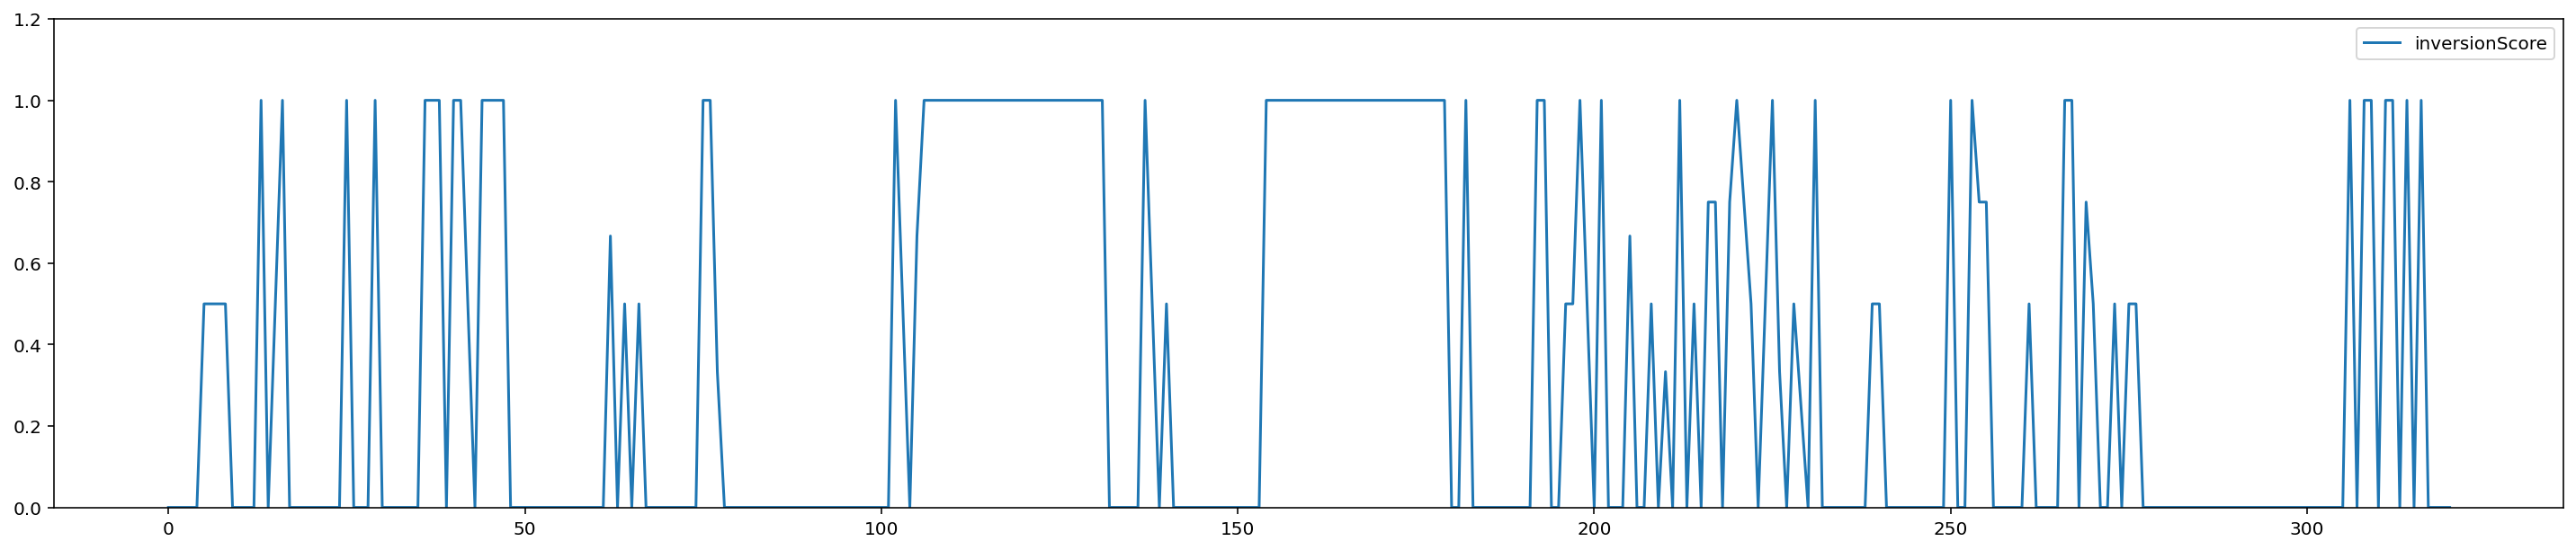

In [67]:
print("Top problematic annotations:")
display(qualitydf[qualitydf.inversionScore == 1.0])
plt.figure(figsize=(25, 5))
sns.lineplot(data=qualitydf[["inversionScore"]])
plt.ylim(0, 1.2)

<AxesSubplot:xlabel='romanNumeral', ylabel='inversionScore'>

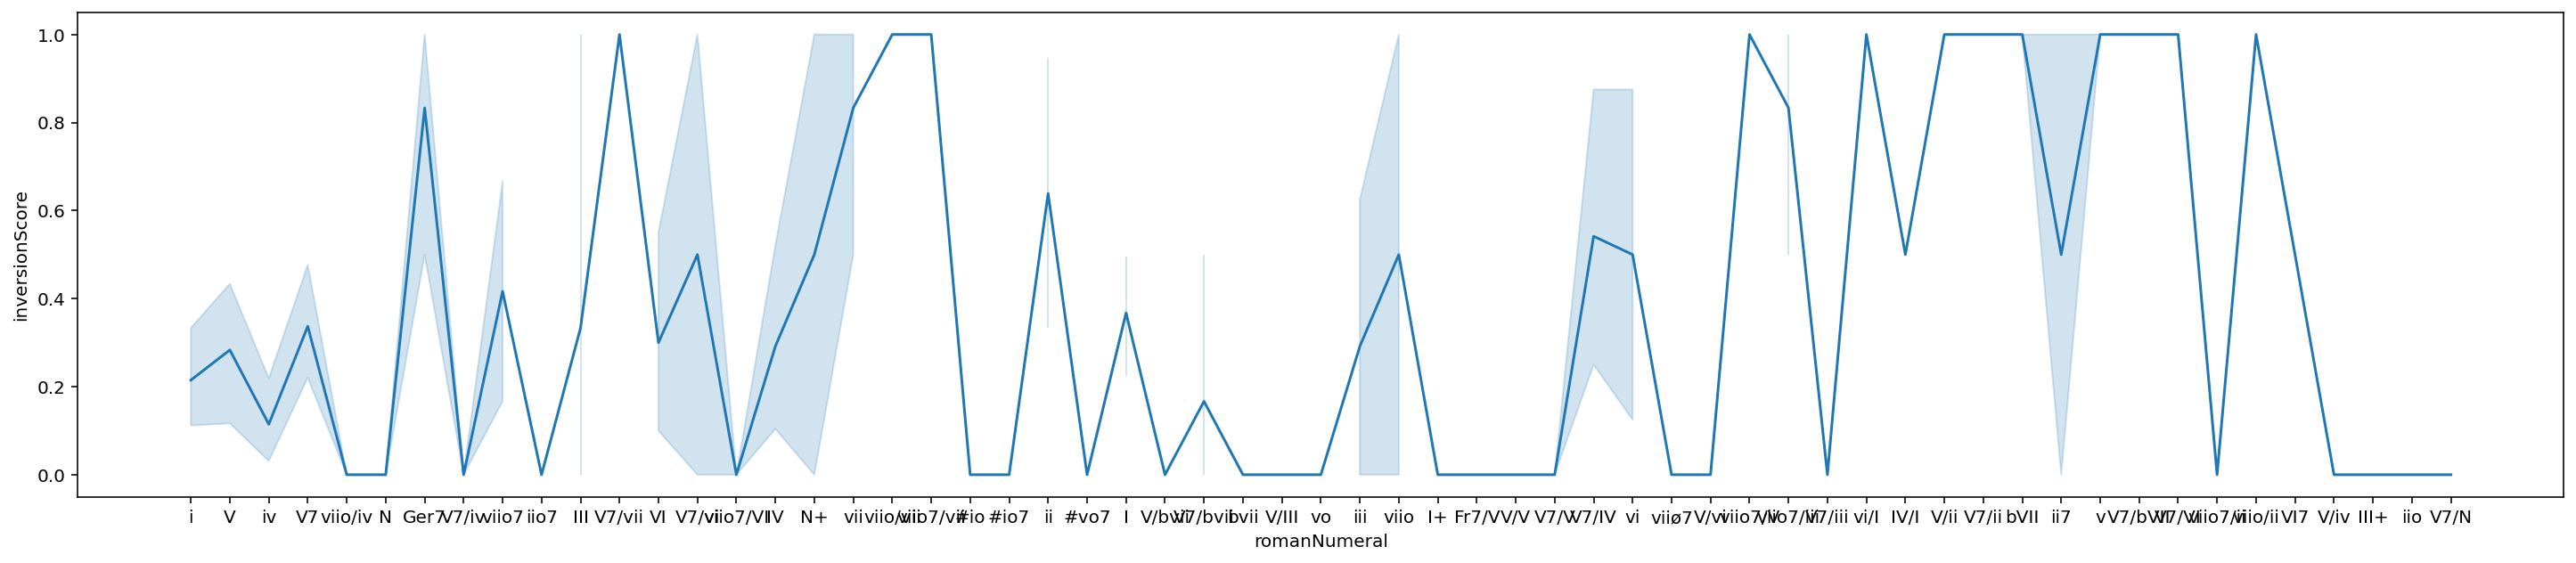

In [66]:
plt.figure(figsize=(25, 5))
sns.lineplot(data=qualitydf, x="romanNumeral", y="inversionScore")